In [48]:
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
os.chdir("V:\BA Study Material\SEMESTER 3\COMPETITIONS\Decision Point")
os.getcwd()

'V:\\BA Study Material\\SEMESTER 3\\COMPETITIONS\\Decision Point'

In [50]:
oasis = pd.read_csv("dataset_X.csv",na_values=["`","JABULANI ","E.C","1451d"],low_memory=False)

In [51]:
oasis.head()

,Call_ID,Sale,Agent_ID,Age,Product_ID,Timezone,Phone_code,First_Name,Last_Name,Area_Code,Gender,Call_Count
0,9545434,False,5265,42,147,2,37.0,Jk,Jk,2302.0,Male,1
1,9211206,False,5226,74,146,2,37.0,Em,Sh,1501.0,Male,10
2,8873010,False,4452,35,144,2,37.0,BI,MI,1550.0,Male,9
3,9852034,False,5461,40,149,2,37.0,WT,LI,1401.0,Male,6
4,9416548,False,5298,26,147,2,37.0,LA,LA,125.0,Female,12


In [52]:
oasis.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [53]:
oasis.info()
oasis.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
Call_ID       100000 non-null int64
Sale          99968 non-null object
Agent_ID      97685 non-null object
Age           100000 non-null int64
Product_ID    100000 non-null int64
Timezone      100000 non-null int64
Phone_code    99972 non-null float64
First_Name    99318 non-null object
Last_Name     99319 non-null object
Area_Code     99536 non-null float64
Gender        100000 non-null object
Call_Count    100000 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


Call_ID          0
Sale            32
Agent_ID      2315
Age              0
Product_ID       0
Timezone         0
Phone_code      28
First_Name     682
Last_Name      681
Area_Code      464
Gender           0
Call_Count       0
dtype: int64

In [54]:
oasis[oasis.columns].nunique()

Call_ID       100000
Sale               2
Agent_ID         243
Age               56
Product_ID        10
Timezone           2
Phone_code         1
First_Name      1753
Last_Name       1759
Area_Code       3305
Gender             3
Call_Count        23
dtype: int64

In [55]:
oasis.describe(include="object")

,Sale,Agent_ID,First_Name,Last_Name,Gender
count,99968,97685,99318,99319,100000
unique,2,243,1753,1759,3
top,False,4955,Ma,Ma,Male
freq,91248,1969,1625,2938,52002


In [59]:
oasis.describe(include="number")

,Call_ID,Sale,Age,Product_ID,Timezone,Phone_code,Area_Code,Call_Count
count,9.996800e+04,99968.000000,99968.000000,99968.000000,99968.000000,99968.000000,9.996800e+04,99968.000000
mean,9.562813e+06,0.087228,52.558499,147.215939,1.999460,0.999730,4.143808e+03,0.367674
std,4.618581e+05,0.282170,16.145413,2.182716,0.032864,0.016432,1.458292e+05,0.346307
min,8.432514e+06,0.000000,25.000000,142.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,9.230470e+06,0.000000,39.000000,146.000000,2.000000,1.000000,1.619000e+03,0.000000
50%,9.527707e+06,0.000000,53.000000,147.000000,2.000000,1.000000,3.201000e+03,0.301030
75%,9.919045e+06,0.000000,66.000000,149.000000,2.000000,1.000000,6.025000e+03,0.602060
max,1.047664e+07,1.000000,80.000000,151.000000,2.000000,1.000000,4.610361e+07,1.740363


In [57]:
oasis = oasis[oasis.Sale.isna() == False]
oasis = oasis.drop(columns=["First_Name","Last_Name"])

In [58]:
oasis.Agent_ID = oasis.Agent_ID.fillna("1111")
oasis.loc[oasis.Sale == True, "Sale"] = int(1)
oasis.loc[oasis.Sale == False, "Sale"] = int(0)

oasis.loc[oasis.Phone_code == 37, "Phone_code"] = int(1)
oasis.Phone_code = oasis.Phone_code.fillna(0)
oasis.Area_Code = oasis.Area_Code.fillna(round(np.mean(oasis.Area_Code)))

# Log Transformations
oasis.Call_Count = np.log10(oasis.Call_Count)

In [60]:
oasis = oasis.astype({"Area_Code": object})
# label_encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
oasis.Area_Code= label_encoder.fit_transform(oasis.Area_Code)

In [61]:
## Create new column as Queue indicator
oasis.loc[oasis.Agent_ID.str.contains(u"QUEUE"), 'inQ'] = int(1)
oasis.loc[oasis.Agent_ID.str.contains(u"QUEUE")==False, 'inQ'] = int(0)

## Remove Queue from Agent_ID
oasis.Agent_ID = oasis.Agent_ID.str.replace(regex=True,pat="QUEUE",repl="")

In [62]:
conv_dict = {"Call_ID": object,
            "Product_ID": object,
            "Timezone": int,
            "inQ":int,
            "Phone_code": int
            }
oasis = oasis.astype(conv_dict)

In [63]:
# oasis.groupby("Product_ID").Sale.value_counts()
pd.crosstab(oasis.Product_ID, oasis.Sale, normalize="index")*100

Sale,0,1
Product_ID,,
142,93.156987,6.843013
143,94.085318,5.914682
144,92.163319,7.836681
145,89.097009,10.902991
146,92.508165,7.491835
147,92.967568,7.032432
148,89.271320,10.728680
149,90.556854,9.443146
150,90.454500,9.545500


In [64]:
pd.crosstab(oasis.Gender, oasis.Sale, normalize="index")*100

Sale,0,1
Gender,,
Female,91.769162,8.230838
Male,90.911189,9.088811
Others,87.090164,12.909836


In [65]:
pd.crosstab(oasis.Timezone, oasis.Sale, normalize="index")*100

Sale,0,1
Timezone,,
0,48.148148,51.851852
2,91.288860,8.711140


In [66]:
pd.crosstab(oasis.Agent_ID, oasis.Sale, normalize="index")*100

Sale,0,1
Agent_ID,,
1111,95.073466,4.926534
4033,100.000000,0.000000
4121,90.079893,9.920107
4219,50.000000,50.000000
4304,20.000000,80.000000
...,...,...
5515,88.235294,11.764706
5516,94.444444,5.555556
5517,100.000000,0.000000


In [67]:
col_names_n = oasis.select_dtypes(include="number").columns
col_names_o = oasis.select_dtypes(include="object").columns

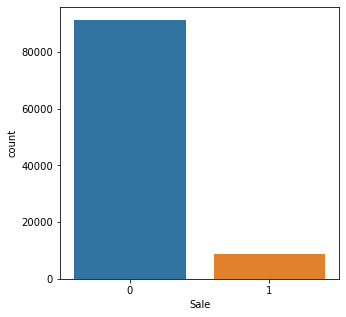

In [131]:
fig, ax = plt.subplots(1, figsize = (5,5))
sns.countplot(oasis.Sale)
plt.show()

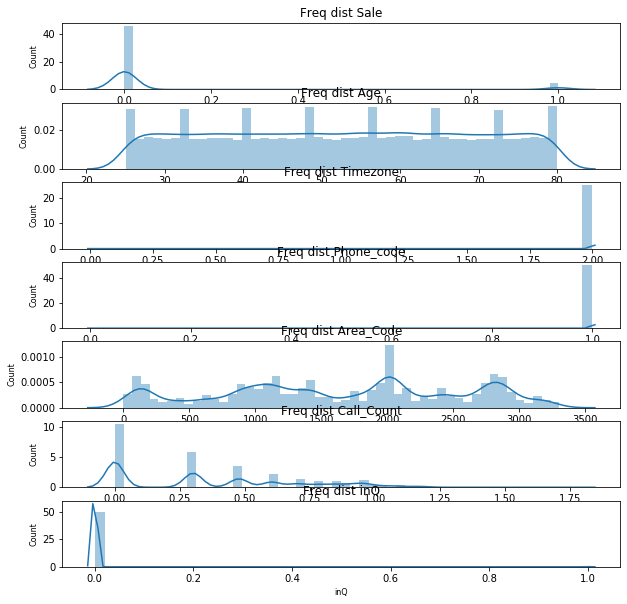

In [136]:
fig, ax = plt.subplots(len(col_names_n), figsize = (10,10))
for i, col_val in enumerate(col_names_n):
    sns.distplot(oasis[col_val],ax=ax[i],hist=True)
    ## Set Labels and ticks
    ax[i].set_title('Freq dist '+col_val, fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
plt.show()

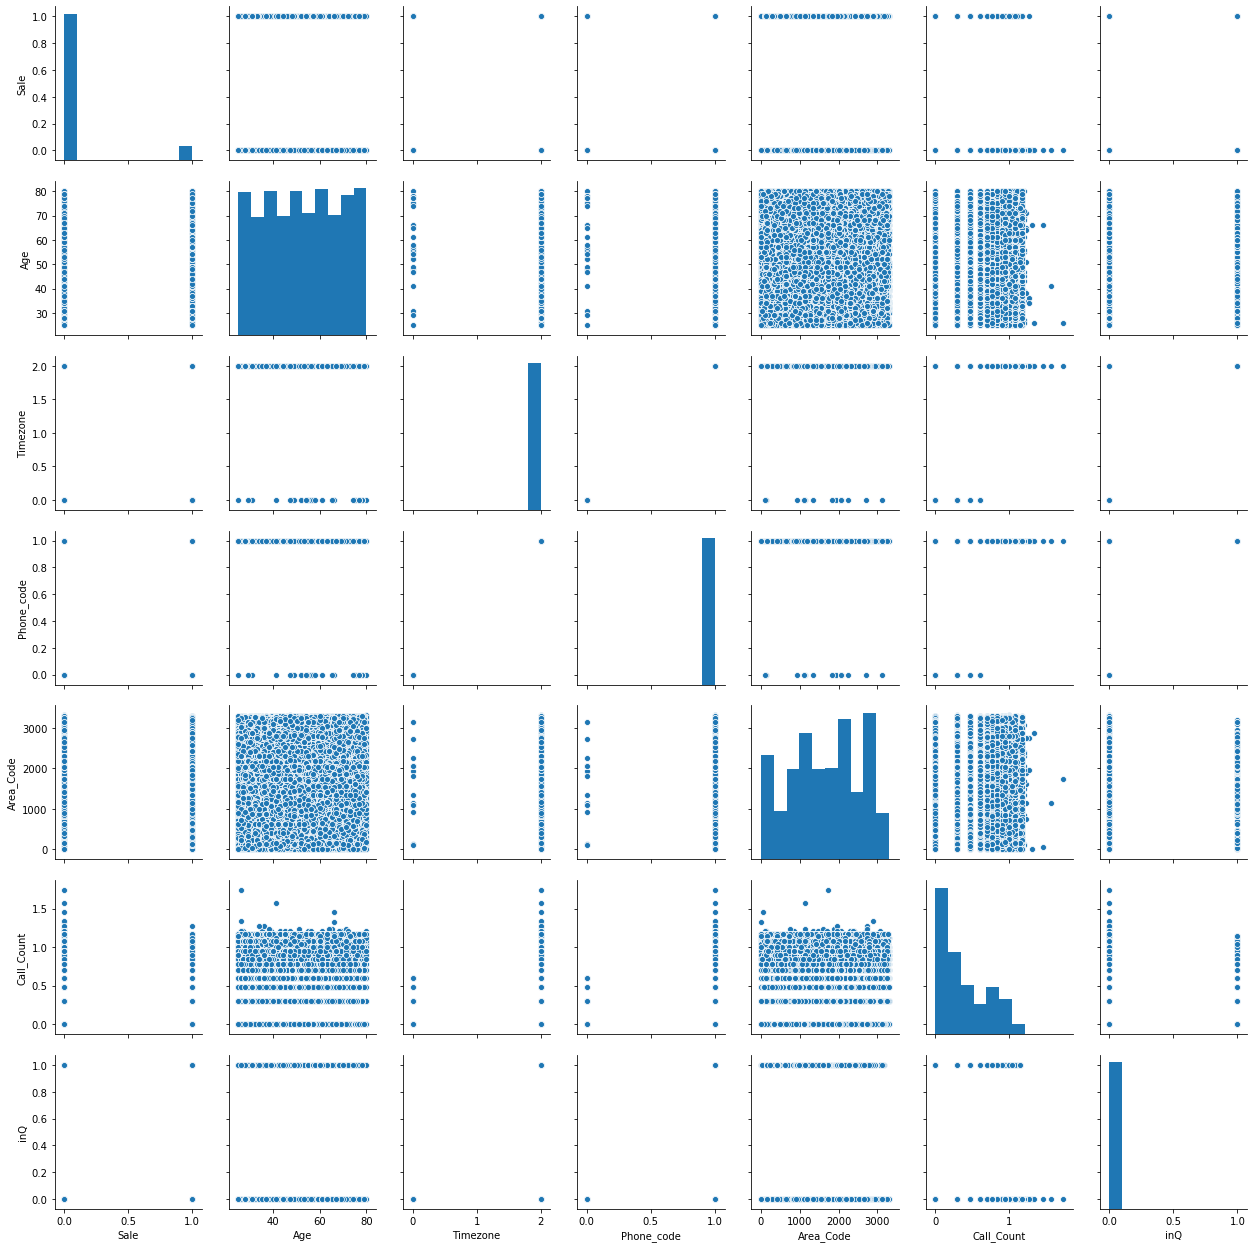

In [69]:
sns.pairplot(oasis[col_names_n])
plt.show()

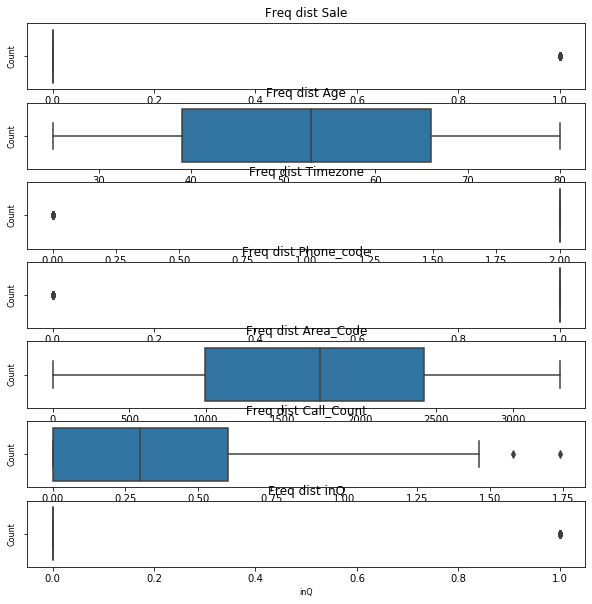

In [135]:
# Outlier Detection
fig, ax = plt.subplots(len(col_names_n),figsize = (10,10))
for i, col_val in enumerate(col_names_n):
    sns.boxplot(oasis[col_val],ax=ax[i])
    ## Set Labels and ticks
    ax[i].set_title('Freq dist '+col_val, fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
plt.show()

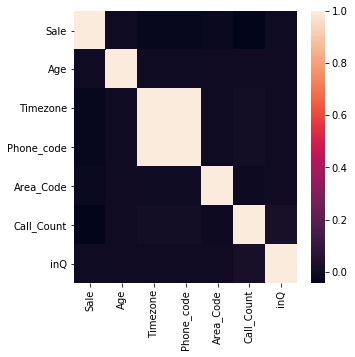

In [134]:
fig, ax = plt.subplots(figsize = (5,5))
corr = oasis[col_names_n].corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

In [72]:
### Data Preprocessing
oadf = oasis.copy()
oadf = oadf.drop(columns = ["Call_ID"])
#col_onam_oasdf = oadf.select_dtypes(include = "object")
dummy_oadf = pd.get_dummies(oadf[["Agent_ID","Product_ID","Gender"]])
oadf = oadf.merge(dummy_oadf, left_index = True, right_index = True)
oadf.head()

,Sale,Agent_ID,Age,Product_ID,Timezone,Phone_code,Area_Code,Gender,Call_Count,inQ,...,Product_ID_145,Product_ID_146,Product_ID_147,Product_ID_148,Product_ID_149,Product_ID_150,Product_ID_151,Gender_Female,Gender_Male,Gender_Others
0,0,5265,42,147,2,1,1466,Male,0.000000,0,...,0,0,1,0,0,0,0,0,1,0
1,0,5226,74,146,2,1,909,Male,1.000000,0,...,0,1,0,0,0,0,0,0,1,0
2,0,4452,35,144,2,1,944,Male,0.954243,0,...,0,0,0,0,0,0,0,0,1,0
3,0,5461,40,149,2,1,825,Male,0.778151,0,...,0,0,0,0,1,0,0,0,1,0
4,0,5298,26,147,2,1,104,Female,1.079181,0,...,0,0,1,0,0,0,0,1,0,0


In [73]:
oadf = oadf.drop(columns = ["Agent_ID","Product_ID","Gender"])

In [74]:
oadf.head()

,Sale,Age,Timezone,Phone_code,Area_Code,Call_Count,inQ,Agent_ID_1111,Agent_ID_4033,Agent_ID_4121,...,Product_ID_145,Product_ID_146,Product_ID_147,Product_ID_148,Product_ID_149,Product_ID_150,Product_ID_151,Gender_Female,Gender_Male,Gender_Others
0,0,42,2,1,1466,0.000000,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,74,2,1,909,1.000000,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,35,2,1,944,0.954243,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,40,2,1,825,0.778151,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,26,2,1,104,1.079181,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [75]:
### Imbalanced Data Sampling ###########
from sklearn.model_selection import train_test_split

y = oadf.Sale
x = oadf.drop('Sale', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=27)

# concatenate our training data back together
train = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_sale = train[train.Sale==0]
sale = train[train.Sale==1]


In [76]:
from sklearn.utils import resample
# upsample minority
sale_upsampled = resample(sale,
                          replace=True, # sample with replacement
                          n_samples=len(not_sale), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled_data = pd.concat([not_sale, sale_upsampled])

# check new class counts
upsampled_data.Sale.value_counts()

1    73051
0    73051
Name: Sale, dtype: int64

In [77]:
# downsample majority
not_sale_downsampled = resample(not_sale,
                                replace = False, # sample without replacement
                                n_samples = len(sale), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled_data = pd.concat([not_sale_downsampled, sale])

# checking counts
downsampled_data.Sale.value_counts()

1    6923
0    6923
Name: Sale, dtype: int64

In [78]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

from collections import Counter
print(sorted(Counter(y_train_sm).items()))

[(0, 73051), (1, 73051)]


In [79]:
from imblearn.combine import SMOTETomek

smtok = SMOTETomek(random_state=27)
X_train_smtok, y_train_smtok = sm.fit_sample(X_train, y_train)

print(sorted(Counter(y_train_smtok).items()))

[(0, 73051), (1, 73051)]


In [80]:
## Random Forest Classifier using upsampling, downsampling, SMOTETomek, SMOTE 
## upsampling RF Model
from sklearn.ensemble import RandomForestClassifier

y_up_rf = upsampled_data.Sale
X_up_rf = upsampled_data.drop('Sale', axis=1)

# Create the model with 100 trees
model_rf_ups = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt').fit(X_up_rf, y_up_rf)


#Predict with Rf model
pred_rf_ups = model_rf_ups.predict(X_test)


In [81]:
## upsampling RF Eval
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc
# Checking accuracy
print(accuracy_score(y_test, pred_rf_ups))
# f1 score
print(f1_score(y_test, pred_rf_ups))
# Recall
print(recall_score(y_test, pred_rf_ups))
# ROC-AUC
fpr_rf_ups, tpr_rf_ups, thresholds = roc_curve(y_test, pred_rf_ups)
rf_ups_auc = roc_auc_score(y_test, pred_rf_ups)
print(rf_ups_auc)
# Precision-Recall Curve
rf_ups_prec, rf_ups_recall, _ = precision_recall_curve(y_test,pred_rf_ups)
print(auc(rf_ups_recall,rf_ups_prec))
# Confusion Matrix
confusion_matrix(y_test, pred_rf_ups)

0.891817545263579
0.10508895324782788
0.07067334446299388
0.5217904832992554
0.1795185558288342


array([[17704,   493],
       [ 1670,   127]], dtype=int64)

In [82]:
# downsampling RF Model
y_dow_rf = downsampled_data.Sale
X_dow_rf = downsampled_data.drop('Sale', axis=1)

# Create the model with 100 trees
model_rf_dow = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt').fit(X_dow_rf, y_dow_rf)

#Predict with Rf model
pred_rf_dow = model_rf_dow.predict(X_test)

In [83]:
# downsampling RF Eval
# Checking accuracy
print(accuracy_score(y_test, pred_rf_dow))
# f1 score
print(f1_score(y_test, pred_rf_dow))
# Recall
print(recall_score(y_test, pred_rf_dow))
# ROC-AUC
fpr_rf_dow, tpr_rf_dow, thresholds = roc_curve(y_test, pred_rf_dow)
rf_dow_auc = roc_auc_score(y_test, pred_rf_dow)
print(rf_dow_auc)
# Precision-Recall Curve
rf_dow_prec, rf_dow_recall, _ = precision_recall_curve(y_test,pred_rf_dow)
print(auc(rf_dow_recall,rf_dow_prec))
# Confusion Matrix
confusion_matrix(y_test, pred_rf_dow)

0.5881764529358807
0.18167362353408864
0.5086254869226489
0.5523288999706392
0.33168777387728526


array([[10846,  7351],
       [  883,   914]], dtype=int64)

In [84]:
# SMOTETomek
# Create the model with 100 trees
model_rf_smtok = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt').fit(X_train_smtok, y_train_smtok)

#Predict with Rf model
pred_rf_smtok = model_rf_smtok.predict(X_test)

In [85]:
# SMOTETomek
# Checking accuracy
print(accuracy_score(y_test, pred_rf_smtok))
# f1 score
print(f1_score(y_test, pred_rf_smtok))
# Recall
print(recall_score(y_test, pred_rf_smtok))
# ROC-AUC
fpr_rf_smtok, tpr_rf_smtok, thresholds = roc_curve(y_test, pred_rf_smtok)
rf_smtok_auc = roc_auc_score(y_test, pred_rf_smtok)
print(rf_smtok_auc)
# Precision-Recall Curve
rf_smtok_prec, rf_smtok_recall, _ = precision_recall_curve(y_test,pred_rf_smtok)
print(auc(rf_smtok_recall,rf_smtok_prec))
# Confusion Matrix
confusion_matrix(y_test, pred_rf_smtok)

0.9007202160648194
0.06938584153774027
0.041179744017807454
0.5133908831645887
0.17379684600586473


array([[17935,   262],
       [ 1723,    74]], dtype=int64)

In [86]:
## SMOTE
# Create the model with 100 trees
model_rf_sm = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt').fit(X_train_sm, y_train_sm)

#Predict with Rf model
pred_rf_sm = model_rf_sm.predict(X_test)

In [87]:
## SMOTE
# Checking accuracy
print(accuracy_score(y_test, pred_rf_sm))
# f1 score
print(f1_score(y_test, pred_rf_sm))
# Recall
print(recall_score(y_test, pred_rf_sm))
# ROC-AUC
fpr_rf_sm, tpr_rf_sm, thresholds = roc_curve(y_test, pred_rf_sm)
rf_sm_auc = roc_auc_score(y_test, pred_rf_sm)
print(rf_sm_auc)
# Precision-Recall Curve
rf_sm_prec, rf_sm_recall, _ = precision_recall_curve(y_test,pred_rf_sm)
print(auc(rf_sm_recall,rf_sm_prec))
# Confusion Matrix
confusion_matrix(y_test, pred_rf_sm)

0.9005701710513154
0.07102803738317758
0.042292710072342796
0.5138099809085679
0.17497143842124524


array([[17930,   267],
       [ 1721,    76]], dtype=int64)

In [95]:
## Feature Importance
rf_feature_imp = pd.Series(model_rf_sm.feature_importances_ ,index = X_train_sm.columns).sort_values(ascending=False)
rf_feature_imp[0:7]
rf_feature_imp.index[0:7]

Index(['Call_Count', 'Area_Code', 'Product_ID_147', 'Gender_Female', 'Age',
       'Product_ID_146', 'Gender_Male'],
      dtype='object')

No handles with labels found to put in legend.


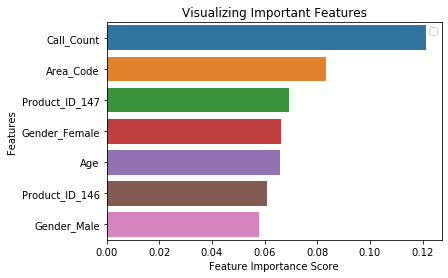

In [96]:
## Plot Important Features
sns.barplot(x=rf_feature_imp[0:7], y=rf_feature_imp.index[0:7])
## Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

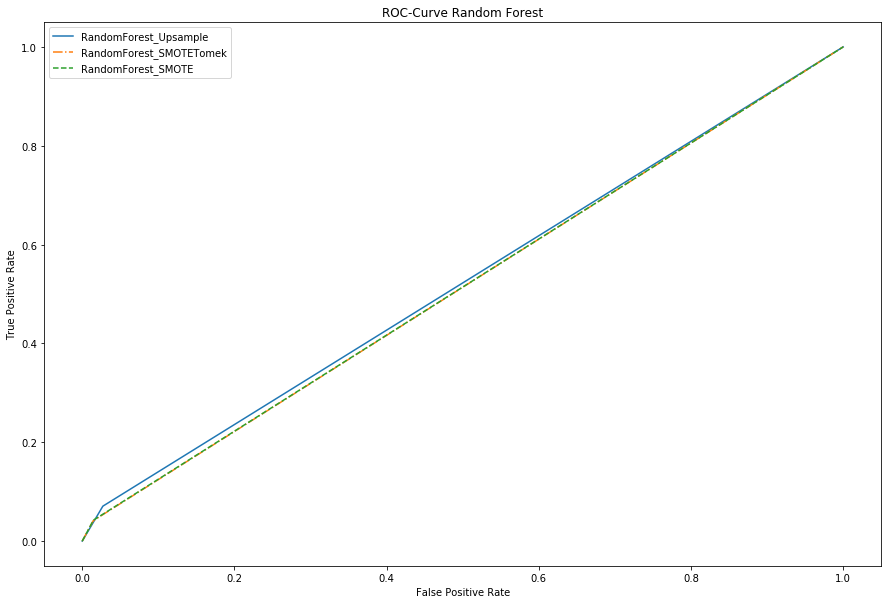

In [119]:
# show the ROC plot
fig, ax = plt.subplots(figsize = (15,10))
plt.plot(fpr_rf_ups, tpr_rf_ups, ls='-', label='RandomForest_Upsample')
plt.plot(fpr_rf_smtok, tpr_rf_smtok, ls='-.', label='RandomForest_SMOTETomek')
plt.plot(fpr_rf_sm, tpr_rf_sm, ls='--', label='RandomForest_SMOTE')

plt.title("ROC-Curve Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

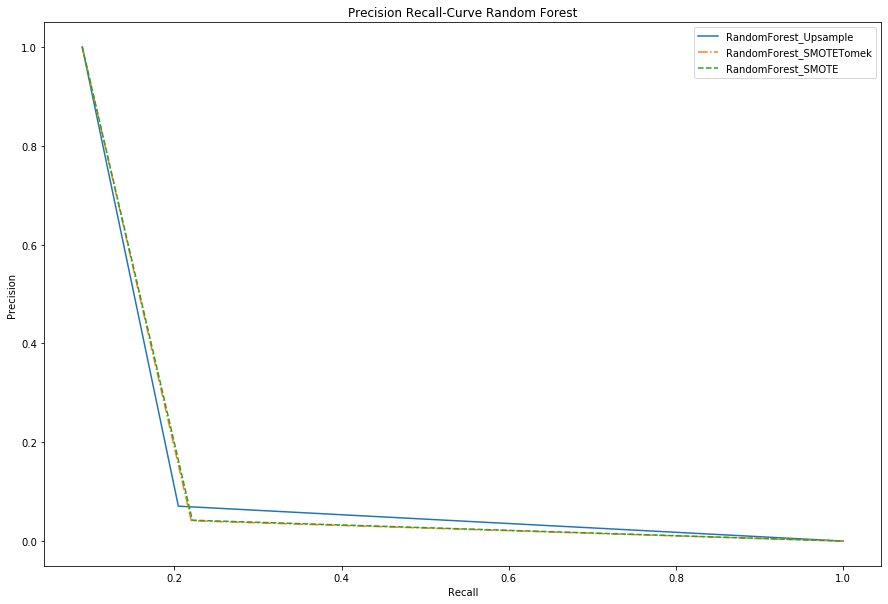

In [120]:
# show the Precision Recall-Curve
fig, ax = plt.subplots(figsize = (15,10))
plt.plot(rf_ups_prec, rf_ups_recall, ls='-', label='RandomForest_Upsample')
plt.plot(rf_smtok_prec, rf_smtok_recall, ls='-.', label='RandomForest_SMOTETomek')
plt.plot(rf_sm_prec, rf_sm_recall, ls='--', label='RandomForest_SMOTE')

plt.title("Precision Recall-Curve Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [100]:
##### XGBOOST ######
## Prep data for xgboost
#!pip install xgboost
import xgboost as xgb
# Upsampling
xg_train_ups = xgb.DMatrix(X_up_rf, label=y_up_rf)

# Downsampling
xg_train_dow = xgb.DMatrix(X_dow_rf, label=y_dow_rf)

# SMOTE
xg_train_sm = xgb.DMatrix(X_train_sm, label=y_train_sm)

# SMOTET
xg_train_smtok = xgb.DMatrix(X_train_smtok, label=y_train_smtok)

## Test Data
xg_test = xgb.DMatrix(X_test, label=y_test)

C:\Users\vaima\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vaima\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [101]:
# Parameter initialization
param_xgb = {
    'eta': 0.1,
    'gamma': 0,
    'max_depth': 6,
    'min_child_weight':1,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'scale_pos_weight': 1,
    'max_delta_step':5,
    'objective': 'binary:logistic'
} 
steps_xgb = 20


In [102]:
model_xgb_ups = xgb.train(param_xgb, xg_train_ups, steps_xgb)
pred_xgb_ups = model_xgb_ups.predict(xg_test)
pred_xgb_ups = np.asarray([1 if line >= 0.5 else 0 for line in pred_xgb_ups])

In [103]:
## upsampling RF Eval
# Checking accuracy
print(accuracy_score(y_test, pred_xgb_ups))
# f1 score
print(f1_score(y_test, pred_xgb_ups))
# Recall
print(recall_score(y_test, pred_xgb_ups))
# ROC-AUC
fpr_xgb_ups, tpr_xgb_ups, thresholds = roc_curve(y_test, pred_xgb_ups)
xgb_ups_auc = roc_auc_score(y_test, pred_xgb_ups)
print(xgb_ups_auc)
# Precision-Recall Curve
xgb_ups_prec, xgb_ups_recall, _ = precision_recall_curve(y_test,pred_xgb_ups)
print(auc(xgb_ups_recall,xgb_ups_prec))
# Confusion Matrix
confusion_matrix(y_test, pred_xgb_ups)

0.6175852755826748
0.18866723259762308
0.49471341124095713
0.5622162978609578
0.3283433131275766


array([[11459,  6738],
       [  908,   889]], dtype=int64)

In [104]:
model_xgb_dow = xgb.train(param_xgb, xg_train_dow, steps_xgb)

pred_xgb_dow = model_xgb_dow.predict(xg_test)
pred_xgb_dow = np.asarray([1 if line >= 0.5 else 0 for line in pred_xgb_dow])

In [105]:
## downsampling RF Eval
# Checking accuracy
print(accuracy_score(y_test, pred_xgb_dow))
# f1 score
print(f1_score(y_test, pred_xgb_dow))
# Recall
print(recall_score(y_test, pred_xgb_dow))
# ROC-AUC
fpr_xgb_dow, tpr_xgb_dow, thresholds = roc_curve(y_test, pred_xgb_dow)
xgb_dow_auc = roc_auc_score(y_test, pred_xgb_dow)
print(xgb_dow_auc)
# Precision-Recall Curve
xgb_dow_prec, xgb_dow_recall, _ = precision_recall_curve(y_test,pred_xgb_dow)
print(auc(xgb_dow_recall,xgb_dow_prec))
# Confusion Matrix
confusion_matrix(y_test, pred_xgb_dow)

0.6032309692907872
0.1824178089250747
0.49248747913188645
0.553327324772296
0.32502073087229033


array([[11176,  7021],
       [  912,   885]], dtype=int64)

In [106]:
model_xgb_sm = xgb.train(param_xgb, xg_train_sm, steps_xgb)

pred_xgb_sm = model_xgb_sm.predict(xg_test)
pred_xgb_sm = np.asarray([1 if line >= 0.5 else 0 for line in pred_xgb_sm])

In [107]:
## SMOTE XGB Eval
# Checking accuracy
print(accuracy_score(y_test, pred_xgb_sm))
# f1 score
print(f1_score(y_test, pred_xgb_sm))
# Recall
print(recall_score(y_test, pred_xgb_sm))
# ROC-AUC
fpr_xgb_sm, tpr_xgb_sm, thresholds = roc_curve(y_test, pred_xgb_sm)
xgb_sm_auc = roc_auc_score(y_test, pred_xgb_sm)
print(xgb_sm_auc)
# Precision-Recall Curve
xgb_sm_prec, xgb_sm_recall, _ = precision_recall_curve(y_test,pred_xgb_sm)
print(auc(xgb_sm_recall,xgb_sm_prec))
# Confusion Matrix
confusion_matrix(y_test, pred_xgb_sm)

0.9085725717715315
0.029723991507430995
0.015581524763494713
0.5061696160389436
0.21294857409307683


array([[18138,    59],
       [ 1769,    28]], dtype=int64)

In [108]:
model_xgb_smtok = xgb.train(param_xgb, xg_train_smtok, steps_xgb)

pred_xgb_smtok = model_xgb_smtok.predict(xg_test)
pred_xgb_smtok = np.asarray([1 if line >= 0.5 else 0 for line in pred_xgb_smtok])

In [109]:
## SMOTE XGB Eval
# Checking accuracy
print(accuracy_score(y_test, pred_xgb_smtok))
# f1 score
print(f1_score(y_test, pred_xgb_smtok))
# Recall
print(recall_score(y_test, pred_xgb_smtok))
# ROC-AUC
fpr_xgb_smtok, tpr_xgb_smtok, thresholds = roc_curve(y_test, pred_xgb_smtok)
xgb_smtok_auc = roc_auc_score(y_test, pred_xgb_smtok)
print(xgb_smtok_auc)
# Precision-Recall Curve
xgb_smtok_prec, xgb_smtok_recall, _ = precision_recall_curve(y_test,pred_xgb_smtok)
print(auc(xgb_smtok_recall,xgb_smtok_prec))
# Confusion Matrix
confusion_matrix(y_test, pred_xgb_smtok)

0.9085725717715315
0.029723991507430995
0.015581524763494713
0.5061696160389436
0.21294857409307683


array([[18138,    59],
       [ 1769,    28]], dtype=int64)

In [110]:
## Feature Importance
xgb_feature_imp = pd.Series(model_xgb_sm.get_fscore(),index = X_train_sm.columns).sort_values(ascending=False)
xgb_feature_imp[0:7]
X_train_sm.columns[0:7]

Index(['Age', 'Timezone', 'Phone_code', 'Area_Code', 'Call_Count', 'inQ',
       'Agent_ID_1111'],
      dtype='object')

No handles with labels found to put in legend.


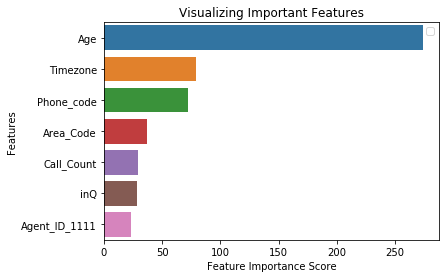

In [111]:
## Plot Important Features
sns.barplot(x=xgb_feature_imp[0:7], y=X_train_sm.columns[0:7])
## Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

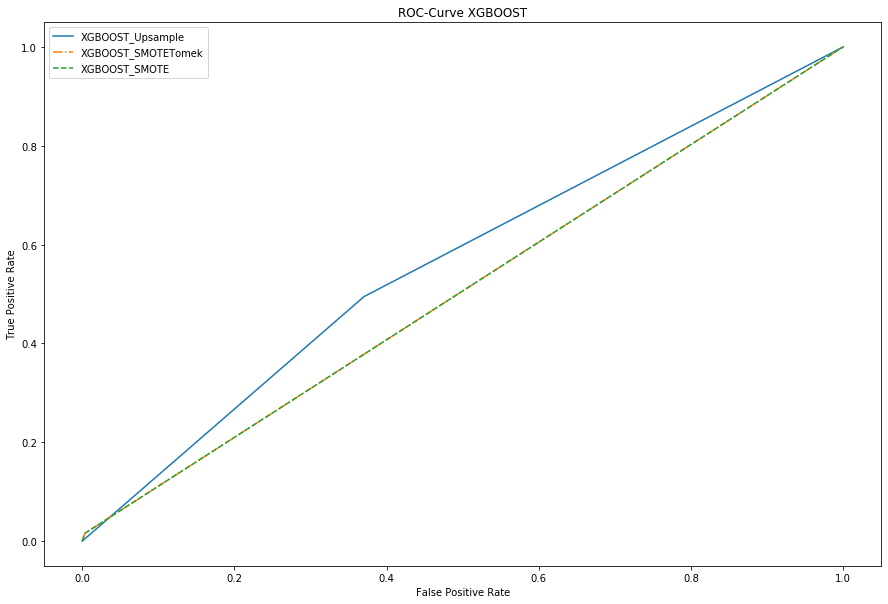

In [117]:
# show the ROC plot
fig, ax = plt.subplots(figsize = (15,10))
plt.plot(fpr_xgb_ups, tpr_xgb_ups, ls='-', label='XGBOOST_Upsample')
plt.plot(fpr_xgb_smtok, tpr_xgb_smtok, ls='-.', label='XGBOOST_SMOTETomek')
plt.plot(fpr_xgb_sm, tpr_xgb_sm, ls='--', label='XGBOOST_SMOTE')

plt.title("ROC-Curve XGBOOST")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

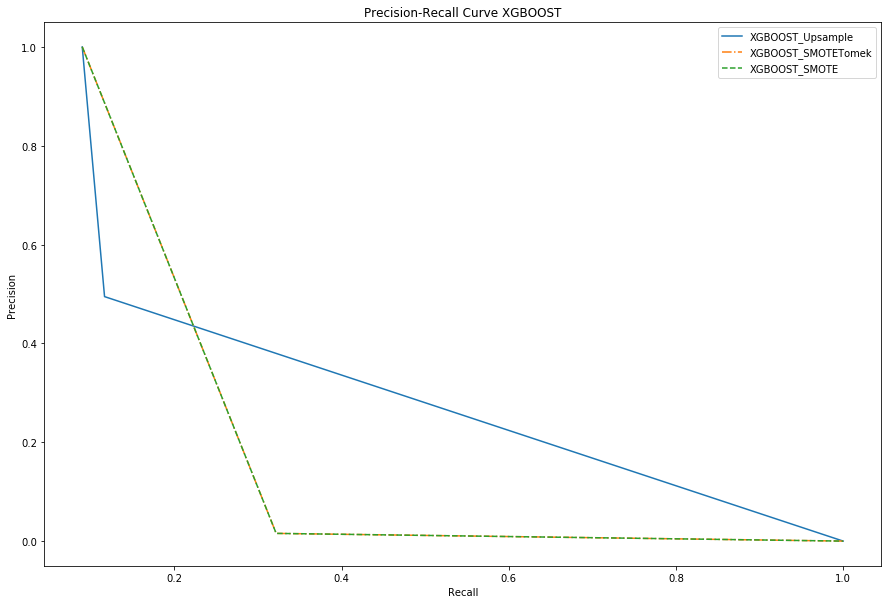

In [118]:
# show the Precesion Recall plot
fig, ax = plt.subplots(figsize = (15,10))
plt.plot(xgb_ups_prec, xgb_ups_recall, ls='-', label='XGBOOST_Upsample')
plt.plot(xgb_smtok_prec, xgb_smtok_recall, ls='-.', label='XGBOOST_SMOTETomek')
plt.plot(xgb_sm_prec, xgb_sm_recall, ls='--', label='XGBOOST_SMOTE')

plt.title("Precision-Recall Curve XGBOOST")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [122]:
Results = {'Model':['RF','RF', 'RF','XGB','XGB', 'XGB'],
           'Sampling Method': ['Upsample','SMOTE', 'SMOTETomtek','Upsample','SMOTE', 'SMOTETomtek'],
           'Accuracy':[round(accuracy_score(y_test, pred_rf_ups),3),
                       round(accuracy_score(y_test, pred_rf_sm),3),
                       round(accuracy_score(y_test, pred_rf_smtok),3),
                      round(accuracy_score(y_test, pred_xgb_ups),3),
                      round(accuracy_score(y_test, pred_xgb_sm),3),
                      round(accuracy_score(y_test, pred_xgb_smtok),3)
                      ],
           'F1 Score':[round(f1_score(y_test, pred_rf_ups),3),
                       round(f1_score(y_test, pred_rf_sm),3),
                       round(f1_score(y_test, pred_rf_smtok),3),
                       round(f1_score(y_test, pred_xgb_ups),3),
                       round(f1_score(y_test, pred_xgb_sm),3),
                       round(f1_score(y_test, pred_xgb_smtok),3)
                      ],
           'Recall':[round(recall_score(y_test, pred_rf_ups),3),
                     round(recall_score(y_test, pred_rf_sm),2),
                     round(recall_score(y_test, pred_rf_smtok),3),
                     round(recall_score(y_test, pred_xgb_ups),3),
                     round(recall_score(y_test, pred_xgb_sm),3),
                     round(recall_score(y_test, pred_xgb_smtok),3)
                    ],
           'ROC-AUC':[round(rf_ups_auc,3),
                      round(rf_sm_auc,3),
                      round(rf_smtok_auc,3),
                      round(xgb_ups_auc,3),
                      round(xgb_sm_auc,3),
                      round(xgb_smtok_auc,3)
                     ],
           'PR-AUC':[round(auc(rf_ups_recall,rf_ups_prec),3),
                     round(auc(rf_sm_recall,rf_sm_prec),3),
                     round(auc(rf_smtok_recall,rf_smtok_prec),3),
                     round(auc(xgb_ups_recall,xgb_ups_prec),3),
                     round(auc(xgb_sm_recall,xgb_sm_prec),3),
                     round(auc(xgb_smtok_recall,xgb_smtok_prec),3)
                    ]
          }
Results = pd.DataFrame(Results)
Results

,Model,Sampling Method,Accuracy,F1 Score,Recall,ROC-AUC,PR-AUC
0,RF,Upsample,0.892,0.105,0.071,0.522,0.180
1,RF,SMOTE,0.901,0.071,0.040,0.514,0.175
2,RF,SMOTETomtek,0.901,0.069,0.041,0.513,0.174
3,XGB,Upsample,0.618,0.189,0.495,0.562,0.328
4,XGB,SMOTE,0.909,0.030,0.016,0.506,0.213
5,XGB,SMOTETomtek,0.909,0.030,0.016,0.506,0.213
